In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf 
import statsmodels.api as sm
import statsmodels as sms

%matplotlib inline

In [2]:
#Import $AMC price data from yfinance and save it as a variable, import data back to July 2020

amc = yf.download('AMC', "2020-07-01", "2021-06-25", parse_dates=True, index_col='date')
amc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,4.260000,4.600000,4.260000,4.570000,4.570000,4914500
2020-07-02,4.690000,4.690000,4.470000,4.530000,4.530000,3908400
2020-07-06,4.620000,4.640000,4.130000,4.280000,4.280000,5489700
2020-07-07,4.180000,4.290000,4.080000,4.130000,4.130000,2667600
2020-07-08,4.490000,4.520000,4.200000,4.430000,4.430000,5586800
...,...,...,...,...,...,...
2021-06-18,61.259998,64.959999,56.849998,59.259998,59.259998,242896900
2021-06-21,61.340000,63.009998,53.430000,55.689999,55.689999,185876100
2021-06-22,54.099998,58.740002,51.049999,58.270000,58.270000,169494100


In [3]:
#Import correlation functions from statsmodels library 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

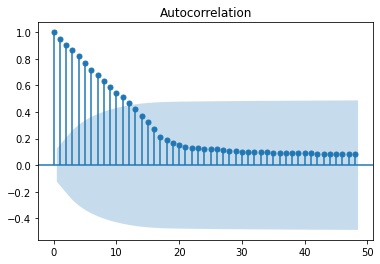

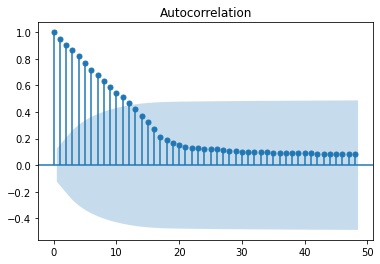

In [4]:
# Plot the auto correlation of AMC Adjusted Close Prices. Autocorrelation, also known as serial correlation,
# refers to the degree of correlation of the same variables between two successive time intervals.

plot_acf(amc['Adj Close'], lags = 48)

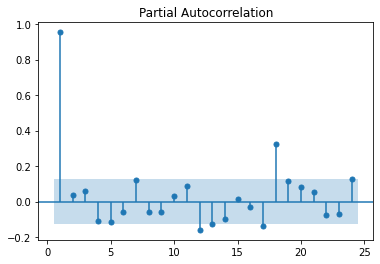

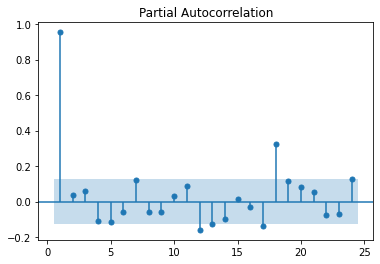

In [5]:
#Plot the partial autocorrelation of AMC Adj Close Prices. 

sms.graphics.tsaplots.plot_pacf(amc['Adj Close'], lags = 24, zero = False)

<AxesSubplot:xlabel='Date'>

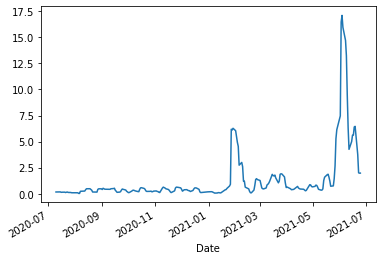

In [7]:
#Plot a rolling 7-dat standard deviation of TSLA's closing prices 

amc['Adj Close'].rolling(window=7).std().plot()

<AxesSubplot:xlabel='Date'>

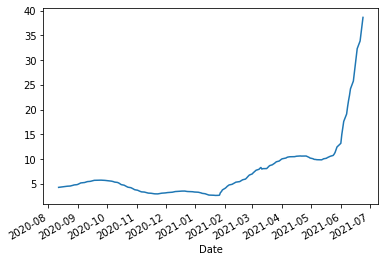

In [8]:
#Plot a rolling 30-day mean of AMC's adjusted close price 

amc['Adj Close'].rolling(window=30).mean().plot()

In [9]:
# Import statsmodel library to run ARIMA preditions. ARIMA uses the auto correlation and moving averages to look for correlated datapoints within a dataframe. ARIMA makes the data stationary so you 
# will not have to convert it from non stationary.

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(amc['Close'], order = (2,1,2))
results = model.fit()
results.summary()

C:\Users\Luke\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Luke\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it h

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  247
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -583.639
Method:                       css-mle   S.D. of innovations              2.565
Date:                Tue, 29 Jun 2021   AIC                           1179.279
Time:                        23:49:18   BIC                           1200.335
Sample:                             1   HQIC                          1187.756
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2159      0.149      1.446      0.148      -0.077       0.509
ar.L1.D.Close     0.4554      0.102      4.468      0.000       0.256       0.655
ar.L2.D.Close    -0.6605      0.072     -9.120      0.000      -0.802      -0.519
ma.L1.D.Close    -0.7566      0.080     -9.511      0.000      -0.913      -0.601
ma.L2.D.Close     0.8597      0.053     16.252      0.000       0.756       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3447           -1.1812j            1.2304           -0.2048
AR.2            0.3447           +1.1812j            1.2304            0.2048
MA.1            0.4401           -0.9847j            1.0785           -0.1831
MA.2            0.4401           +0.9847j            1.0785            0.1831
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'AMC returns forecast'}>

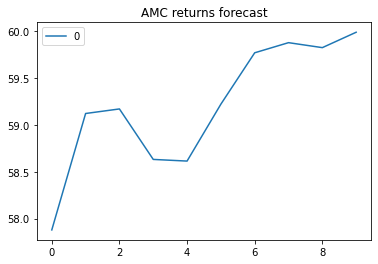

In [10]:
# Plot a forecast of the AMC adj closed on the next 10 days based on the past prices of AMC

pd.DataFrame(results.forecast(steps = 10)[0]).plot(title = 'AMC returns forecast')